<a href="https://colab.research.google.com/github/gomesrd/ai-fatec-sp/blob/main/fatec_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalando Tableone

In [ ]:
!pip -q install tableone

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.0 MB/s eta 0:00:00


# Exploracão do modelo

,idade,tempo_como_cliente_meses,plano,frequencia_login_semana,num_reclamacoes,utiliza_app_mobile,usou_suporte_tecnico,pagamento_em_dia,valor_mensal,cancelou_assinatura
0,63,17,basico,14,3,0,1,0,199.9,False
1,20,5,premium,4,4,0,1,0,29.9,True
2,46,4,standard,7,5,1,1,1,29.9,True
3,52,3,basico,11,1,1,0,1,199.9,True
4,56,21,premium,6,0,0,1,0,29.9,False





📌 Estrutura do DataFrame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   idade                     20 non-null     int64   
 1   tempo_como_cliente_meses  20 non-null     int64   
 2   plano                     20 non-null     category
 3   frequencia_login_semana   20 non-null     int64   
 4   num_reclamacoes           20 non-null     int64   
 5   utiliza_app_mobile        20 non-null     int64   
 6   usou_suporte_tecnico      20 non-null     int64   
 7   pagamento_em_dia          20 non-null     int64   
 8   valor_mensal              20 non-null     float64 
 9   cancelou_assinatura       20 non-null     boolean 
dtypes: boolean(1), category(1), float64(1), int64(7)
memory usage: 1.6 KB



📊 Estatísticas descritivas


,idade,tempo_como_cliente_meses,frequencia_login_semana,num_reclamacoes,utiliza_app_mobile,usou_suporte_tecnico,pagamento_em_dia,valor_mensal
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000
mean,45.850000,23.250000,6.150000,2.350000,0.450000,0.700000,0.35000,76.900000
std,11.828934,13.455091,4.120232,1.531253,0.510418,0.470162,0.48936,60.096414
min,20.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.00000,29.900000
25%,37.000000,11.750000,2.000000,1.000000,0.000000,0.000000,0.00000,29.900000
50%,50.000000,25.000000,6.500000,3.000000,0.000000,1.000000,0.00000,49.900000
75%,52.500000,34.250000,9.250000,3.000000,1.000000,1.000000,1.00000,99.900000
max,64.000000,42.000000,14.000000,5.000000,1.000000,1.000000,1.00000,199.900000


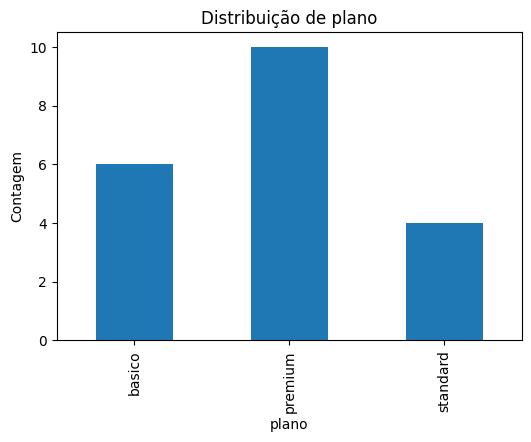

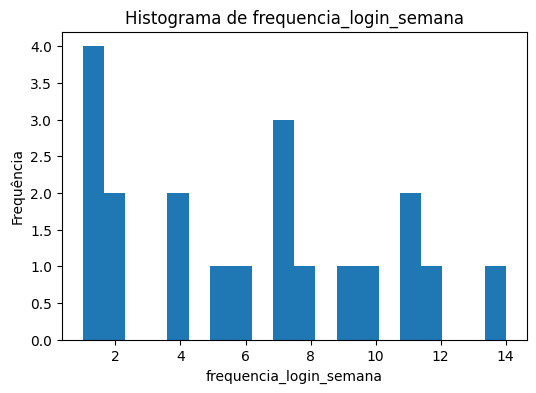

In [ ]:
# ======================================
# Importação de bibliotecas
# ======================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tableone import TableOne
from IPython.display import display

# ======================================
# Carregar o arquivo CSV
# ======================================
file_id = "1h5_LVoqw0rhMVpFpYxwznJZqch015H0D"
url = f"https://drive.google.com/uc?id={file_id}"

df = pd.read_csv(url)

# ======================================
# Padronização dos nomes das colunas
# ======================================
df.columns = (df.columns
              .str.strip()                            # Remove espaços extras
              .str.lower()                            # Coloca em minúsculas
              .str.normalize('NFKD')                  # Normaliza caracteres especiais
              .str.encode('ascii', errors='ignore')   # Remove acentos
              .str.decode('utf-8')
              .str.replace(' ', '_'))                 # Substitui espaços por "_"

# ======================================
# Tratamento de variáveis categóricas
# ======================================
colunas_categoricas = ['plano']
for c in colunas_categoricas:
    if c in df:
        df[c] = df[c].astype('category')

# ======================================
# Conversão de colunas numéricas
# ======================================
df['valor_mensal'] = pd.to_numeric(df['valor_mensal'], errors='coerce')

colunas_float = ['valor_mensal']
for c in colunas_float:
    if c in df:
        df[c] = df[c].astype('float')

# ======================================
# Conversão de colunas booleanas
# ======================================
colunas_boolenas = ['cancelou_assinatura']
for c in colunas_boolenas:
    if c in df:
        df[c] = df[c].astype('boolean')

# ======================================
# Visualização inicial dos dados
# ======================================
# Primeiras linhas
display(df.head())
print("\n")

# Estrutura do DataFrame
print("\n📌 Estrutura do DataFrame")
df.info()
print("\n")


# Estatísticas descritivas
print("\n📊 Estatísticas descritivas")
display(df.describe())
print("\n")


# ======================================
# Análise de variáveis categóricas
# ======================================
col_cat = 'plano'

# Distribuição de frequências
vc = df[col_cat].value_counts(dropna=False).sort_index()

# Gráfico de barras
plt.figure(figsize=(6, 4))
vc.plot(kind='bar')
plt.title(f'Distribuição de {col_cat}')
plt.xlabel(col_cat)
plt.ylabel('Contagem')
plt.show()
print("\n")

# ======================================
# Análise de variáveis numéricas
# ======================================
col_num = 'frequencia_login_semana'

plt.figure(figsize=(6, 4))
df[col_num].dropna().plot(kind='hist', bins=20)
plt.title(f'Histograma de {col_num}')
plt.xlabel(col_num)
plt.ylabel('Frequência')
plt.show()
